Deskripsi Singkat :
DProyek ini bertujuan untuk mengidentifikasi hubungan antara harga alpukat dengan faktor-faktor yang memengaruhi, seperti musim, wilayah geografis, dan persediaan

# Initial Library

In [139]:
import pandas as pd
import numpy as np

In [140]:
df = pd.read_csv("Avocado Sales Trends.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [142]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [143]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [144]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [145]:
df["AveragePrice"] = round(df["AveragePrice"], 2)
df["Total Volume"] = round(df["Total Volume"], 2)
df["4046"] = round(df["4046"], 2)
df["4225"] = round(df["4225"], 2)
df["4770"] = round(df["4770"], 2)
df["Total Bags"] = round(df["Total Bags"], 2)
df["Small Bags"] = round(df["Small Bags"], 2)
df["Large Bags"] = round(df["Large Bags"], 2)
df["XLarge Bags"] = round(df["XLarge Bags"], 2)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

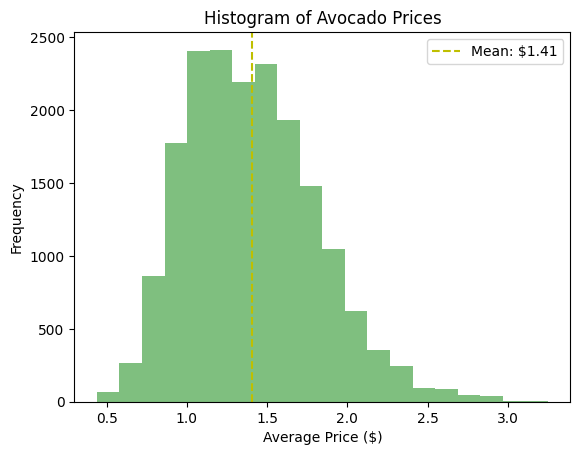

Mean of Average Price in samples = $1.41
Standard deviation of Average Price in samples = $0.40


In [147]:
plt.hist(df["AveragePrice"], bins=20, alpha=0.5, color='g')

# calculate mean and standard deviation
mean_avocado_price = np.mean(df["AveragePrice"])
std_avocado_price = np.std(df["AveragePrice"])

# plot vertical line for mean
plt.axvline(mean_avocado_price, color ="y", linestyle = "--", label = f"Mean: ${mean_avocado_price:.2f}")

# add labels and title
plt.xlabel('Average Price ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Avocado Prices')

# add legend
plt.legend()

# show plot
plt.show()

# print mean and standard deviation
print(f"Mean of Average Price in samples = ${mean_avocado_price:.2f}")
print(f"Standard deviation of Average Price in samples = ${std_avocado_price:.2f}")

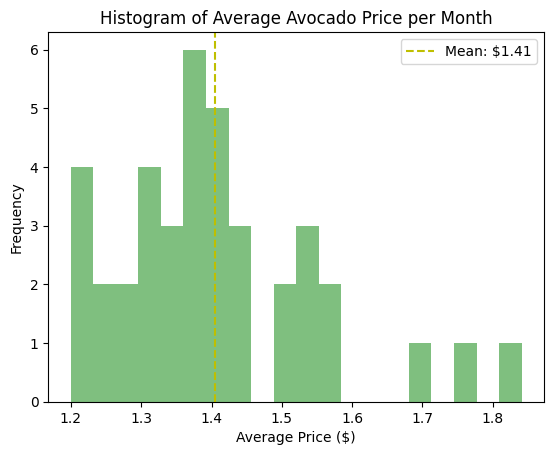

Mean of Average Price per Month = $1.41
Standard deviation of Average Price per Month = $0.15


In [148]:
df_monthly = df.groupby(pd.to_datetime(df['Date']).dt.strftime('%Y-%m'))['AveragePrice'].mean().reset_index()

# calculate mean and standard deviation
mean_avocado_price = df_monthly['AveragePrice'].mean()
std_avocado_price = df_monthly['AveragePrice'].std()

# plot histogram of average price per month
plt.hist(df_monthly['AveragePrice'], bins=20, alpha=0.5, color='g')
plt.axvline(mean_avocado_price, color='y', linestyle='--', label=f'Mean: ${mean_avocado_price:.2f}')
plt.xlabel('Average Price ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Average Avocado Price per Month')
plt.legend()
plt.show()

# print mean and standard deviation
print(f"Mean of Average Price per Month = ${mean_avocado_price:.2f}")
print(f"Standard deviation of Average Price per Month = ${std_avocado_price:.2f}")

<ipython-input-149-540a96c8786a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day = df.groupby('Date').mean()


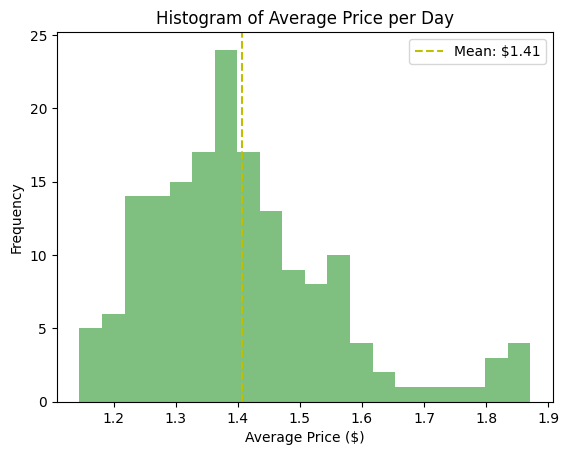

Mean of Average Price per Day = $1.41
Standard deviation of Average Price per Day = $0.15


In [149]:
df_day = df.groupby('Date').mean()

# create histogram
plt.hist(df_day['AveragePrice'], bins=20, alpha=0.5, color='g')

# calculate mean and standard deviation
mean_avocado_price = df_day['AveragePrice'].mean()
std_avocado_price = df_day['AveragePrice'].std()

# plot vertical line for mean
plt.axvline(mean_avocado_price, color ="y", linestyle = "--", label = f"Mean: ${mean_avocado_price:.2f}")

# add labels and title
plt.xlabel('Average Price ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Average Price per Day')

plt.legend()

# show plot
plt.show()

# print mean and standard deviation
print(f"Mean of Average Price per Day = ${mean_avocado_price:.2f}")
print(f"Standard deviation of Average Price per Day = ${std_avocado_price:.2f}")

In [150]:
df['Date'] = pd.to_datetime(df['Date'])

In [151]:
sum_prices = df.groupby(['region', 'Date'])['AveragePrice'].sum().reset_index()

<ipython-input-152-61c492cbb038>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  byRegion = df.groupby('region').mean()


Text(0.5, 1.0, 'Total Avocado Prices by Region"')

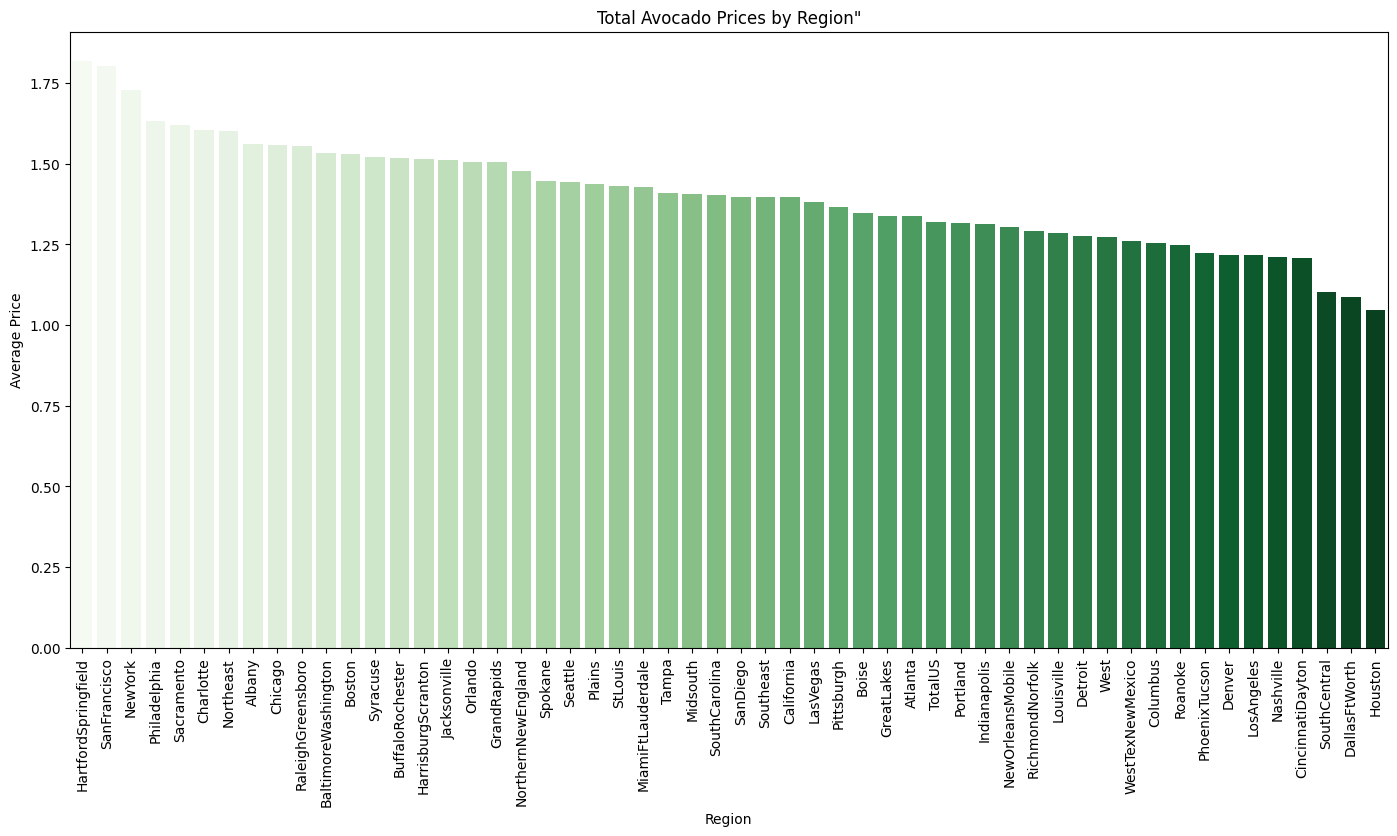

In [152]:
byRegion = df.groupby('region').mean()
byRegion.sort_values(by = ['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize = (17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='Greens')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Total Avocado Prices by Region"')


# Statistical Test

Tujuan dari uji hipotesis ini adalah untuk menentukan apakah perbedaan rata-rata harga buah alpukat antara kedua wilayah tersebut cukup signifikan secara statistik ataukah terjadi hanya akibat kebetulan semata. Dengan mengetahui hasil uji hipotesis ini, maka dapat diambil keputusan yang tepat terkait strategi pemasaran dan penjualan buah alpukat di kedua wilayah tersebut.

Parameter :

H0: μ(California) = μ(New York)

Ha: μ(California) ≠ μ(New York)

In [153]:
from scipy.stats import ttest_ind, shapiro, levene

In [154]:
# Filter data untuk California dan New York
ca_data = df[df['region'] == 'California']['AveragePrice']
ny_data = df[df['region'] == 'NewYork']['AveragePrice']

In [155]:
# Uji normalitas
stat, p = shapiro(ca_data)
print('California data normality test:')
print('Statistic =', stat)
print('p-value =', p)
stat, p = shapiro(ny_data)
print('New York data normality test:')
print('Statistic =', stat)
print('p-value =', p)

California data normality test:
Statistic = 0.9697132706642151
p-value = 1.646200985305768e-06
New York data normality test:
Statistic = 0.9660714268684387
p-value = 4.3330425114618265e-07


In [156]:
# Uji homogenitas varian
stat, p = levene(ca_data, ny_data)
print('Levene test for homogeneity of variances:')
print('Statistic =', stat)
print('p-value =', p)


Levene test for homogeneity of variances:
Statistic = 0.9821802755367824
p-value = 0.32201677192625555


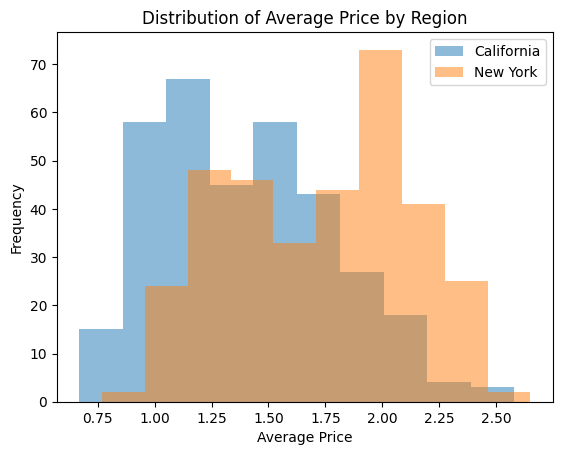

In [157]:
# Membuat histogram
plt.hist(ca_data, alpha=0.5, label='California')
plt.hist(ny_data, alpha=0.5, label='New York')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Distribution of Average Price by Region')
plt.legend()
plt.show()

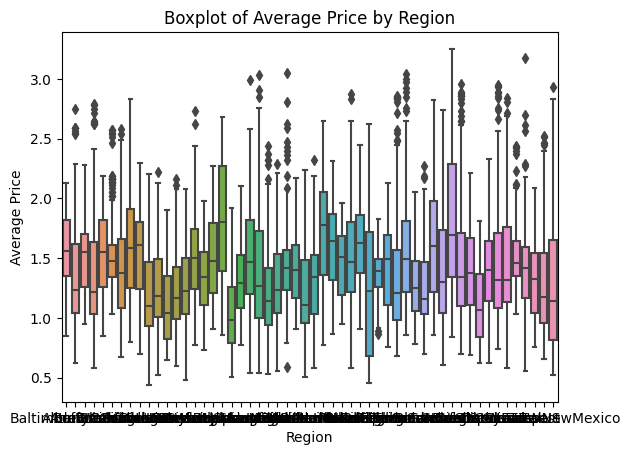

In [158]:
# Membuat boxplot
sns.boxplot(x="region", y="AveragePrice", data=df)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Boxplot of Average Price by Region')
plt.show()

In [159]:
# Uji perbedaan rata-rata
if p >= 0.05:
    # Asumsi homogenitas varian terpenuhi
    t, p = ttest_ind(ca_data, ny_data)
else:
    # Asumsi homogenitas varian tidak terpenuhi
    t, p = ttest_ind(ca_data, ny_data, equal_var=False)

print('Independent t-test results:')
print('t-value =', t)
print('p-value =', p)

Independent t-test results:
t-value = -10.983985146683626
p-value = 6.205128244526595e-26


Hasil uji-t menunjukkan bahwa p-value lebih kecil dari alpha (nilai= 0.05) sehingga terdapat bukti yang cukup untuk menolak hipotesis nol bahwa tidak ada perbedaan rata-rata harga buah alpukat antara wilayah California dan New York. Oleh karena itu, dapat disimpulkan bahwa ada perbedaan rata-rata harga buah alpukat antara kedua wilayah tersebut.

In [160]:
corr_matrix = df.corr(method='pearson')

<ipython-input-160-df68ee030ffa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


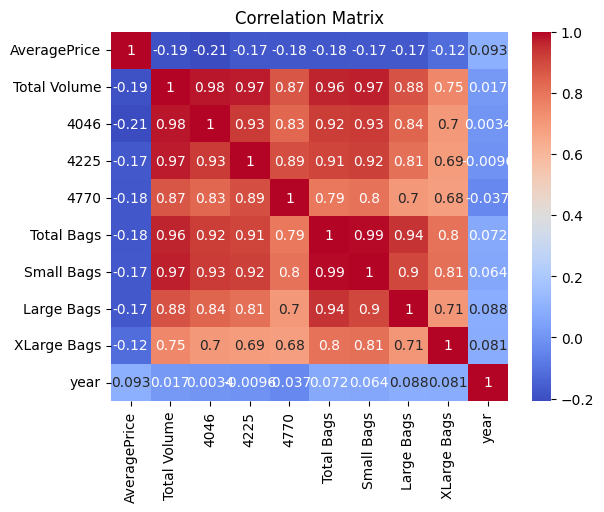

In [161]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression Model

In [162]:
import pandas as pd
import statsmodels.api as sm

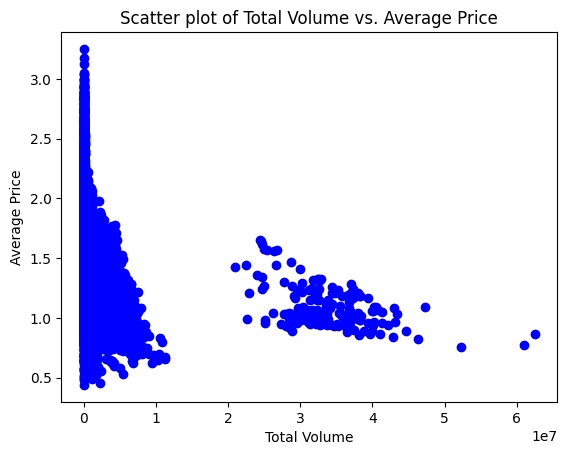

In [163]:
# Filter data for Total Volume and Average Price
X = df['Total Volume']
Y = df['AveragePrice']

# Plot the data
plt.scatter(X, Y, color='blue')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.title('Scatter plot of Total Volume vs. Average Price')
plt.show()

In [167]:
# Create OLS model object
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

# Extract the results (Coefficient and Standard Error) to DataFrame
results_df = results.params.to_frame(name='coef')
results_df['std_err'] = results.bse

# Calculate the t-values and p-values
results_df['t_value'] = results_df['coef'] / results_df['std_err']
results_df['p_value'] = results.pvalues

sns.scatterplot(x="Total Bags", y="AveragePrice", data=df) 
# Fit and plot the regression line
X = df["Total Bags"]
y = df["AveragePrice"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
plt.plot(X.iloc[:, 1], predictions, color='red')

# Set plot labels and title
plt.xlabel("Total Bags")
plt.ylabel("Average Price")
plt.title("Scatter plot with regression line")

# Show the plot
plt.show() 

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     590.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          1.88e-128
Time:                        16:16:43   Log-Likelihood:                -9003.3
No. Observations:               18249   AIC:                         1.801e+04
Df Residuals:                   18247   BIC:                         1.803e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4233      0.003    471.424      0.0

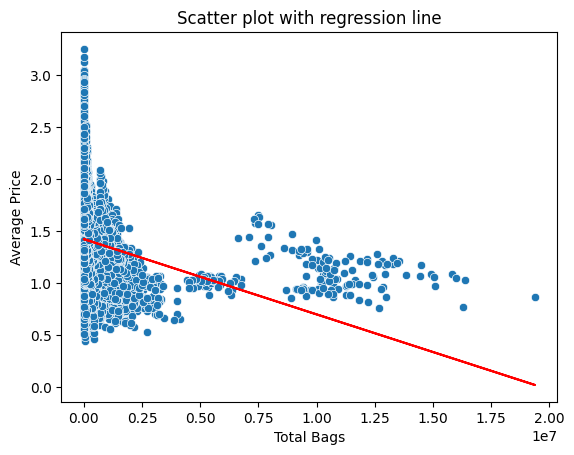

In [165]:
sns.scatterplot(x="Total Bags", y="AveragePrice", data=df) 
# Fit and plot the regression line
X = df["Total Bags"]
y = df["AveragePrice"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
plt.plot(X.iloc[:, 1], predictions, color='red')

# Set plot labels and title
plt.xlabel("Total Bags")
plt.ylabel("Average Price")
plt.title("Scatter plot with regression line")

# Show the plot
plt.show() 

# Coefficient Interpretation

In [168]:
# Interpret the coefficients
print("Intercept:")
print(f"    Coefficient: {results_df.loc['const']['coef']:.2f}")
print(f"    p-value: {results_df.loc['const']['p_value']:.3f}")
print("")
print("Total Bags:")
print(f"    Coefficient: {results_df.loc['Total Bags']['coef']:.2f}")
print(f"    p-value: {results_df.loc['Total Bags']['p_value']:.3f}")

Intercept:
    Coefficient: 1.42
    p-value: 0.000

Total Bags:
    Coefficient: -0.00
    p-value: 0.000


Hasil analisis menunjukkan bahwa koefisien intercept signifikan secara statistik dalam memprediksi nilai variabel dependen, dengan nilai koefisien sebesar 1.42 dan p-value sebesar 0.000. Sedangkan, koefisien Total Bags juga signifikan secara statistik, namun nilainya sangat kecil dan mendekati nol, sehingga mungkin saja variabel independen ini tidak memiliki pengaruh yang signifikan terhadap nilai prediksi variabel dependen. Nilai p-value untuk koefisien Total Bags juga sangat kecil, yaitu sebesar 0.000, menunjukkan bahwa koefisien Total Bags signifikan secara statistik dalam memprediksi nilai variabel dependen.